In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [43]:
df=pd.read_csv('Car_Purchasing_Data.csv', sep=',' , encoding='latin-1')

In [44]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [45]:
df.shape

(500, 9)

In [46]:
#sns.pairplot(df)

In [47]:
X=df.drop(['Customer Name', 'Customer e-mail', 'Country','Car Purchase Amount'],axis=1)
y=df['Car Purchase Amount']

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [48]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [49]:
from sklearn.preprocessing import  MinMaxScaler

In [50]:
scaler=MinMaxScaler()
X_scale=scaler.fit_transform(X)

In [51]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [52]:
y= y.values.reshape(-1,1)

In [53]:
y_scaled=scaler.fit_transform(y)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X_scale, y_scaled, test_size=0.25, random_state=42)

In [56]:
X_train.shape

(375, 5)

In [57]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [58]:
model = Sequential()
model.add(Dense(25, input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_13 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [61]:
epoch_hist= model.fit(X_train,y_train, epochs=100, batch_size=50, verbose=1, validation_split= 0.2)

Epoch 1/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2368 - val_loss: 0.1690
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1462 - val_loss: 0.0935
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0821 - val_loss: 0.0454
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.0240
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.0219
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.0233
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.0195
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.0150
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0150 - val_loss: 0.0125
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0130 - val_loss: 0.0113
Epoch 11/100
6/6 [==========

In [64]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

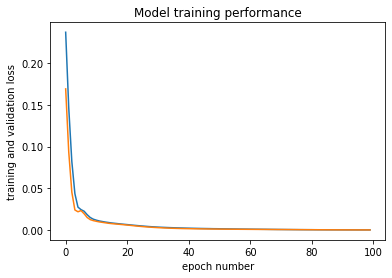

In [71]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model training performance')
plt.ylabel('training and validation loss')
plt.xlabel('epoch number');

In [75]:
# Gender, Age, Annula salary, credit_card debt, net_worth
test= np.array([[0,34,42000,10000,120000]])
worth = model.predict(test)
print('you can purchase a car worth', worth)

you can purchase a car worth [[51910.062]]
